In [54]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sna 
df = pd.read_csv('cust_seg (1).csv')
df=df.drop(columns=['Unnamed: 0','Customer Id'])
df.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [55]:
print('Number of Duplicated Rows', df.duplicated().sum())
print('\n')
df.info()

Number of Duplicated Rows 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [56]:
# fillna Defaulted > 0 
df['Defaulted']=df['Defaulted'].fillna(0)

In [57]:
# The first step when doing KMeans clustering is to scale our data.
# Instantiate Standard Scaler
scaler = StandardScaler()
scaler.fit(df)
scaler_df= pd.DataFrame(scaler.transform(df),columns=df.columns)
scaler_df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507
...,...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.523797,-0.502070
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.523797,-0.472288
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,1.909138,3.458923
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-0.523797,-1.082817


Use KMeans to create various customer segments.

1) Use an Elbow Plot of inertia.
2) And a plot of Silhouette Scores.
3) Choose a K based on the results.

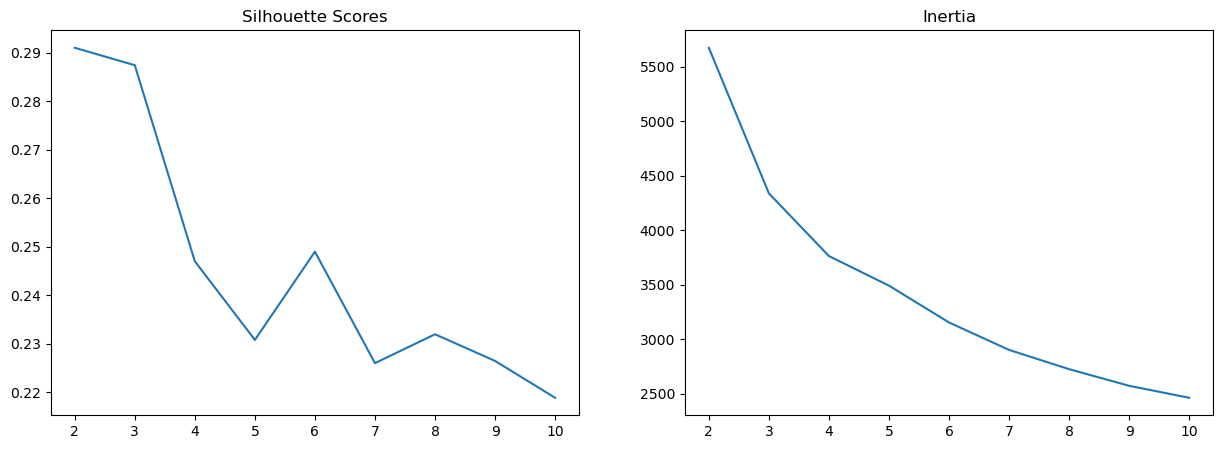

In [58]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range (2,11)

sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(scaler_df)
  sils.append(silhouette_score(scaler_df, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

Choose a K based on the results  > 3

In [59]:
kmeans_model = KMeans(n_clusters=3,n_init="auto", random_state=42)
kmeans_model.fit(scaler_df)
df['cluster']=kmeans_model.labels_

In [60]:
# Group the dataframe by cluster and aggregate by mean values
cluster_groups=df.groupby('cluster',as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


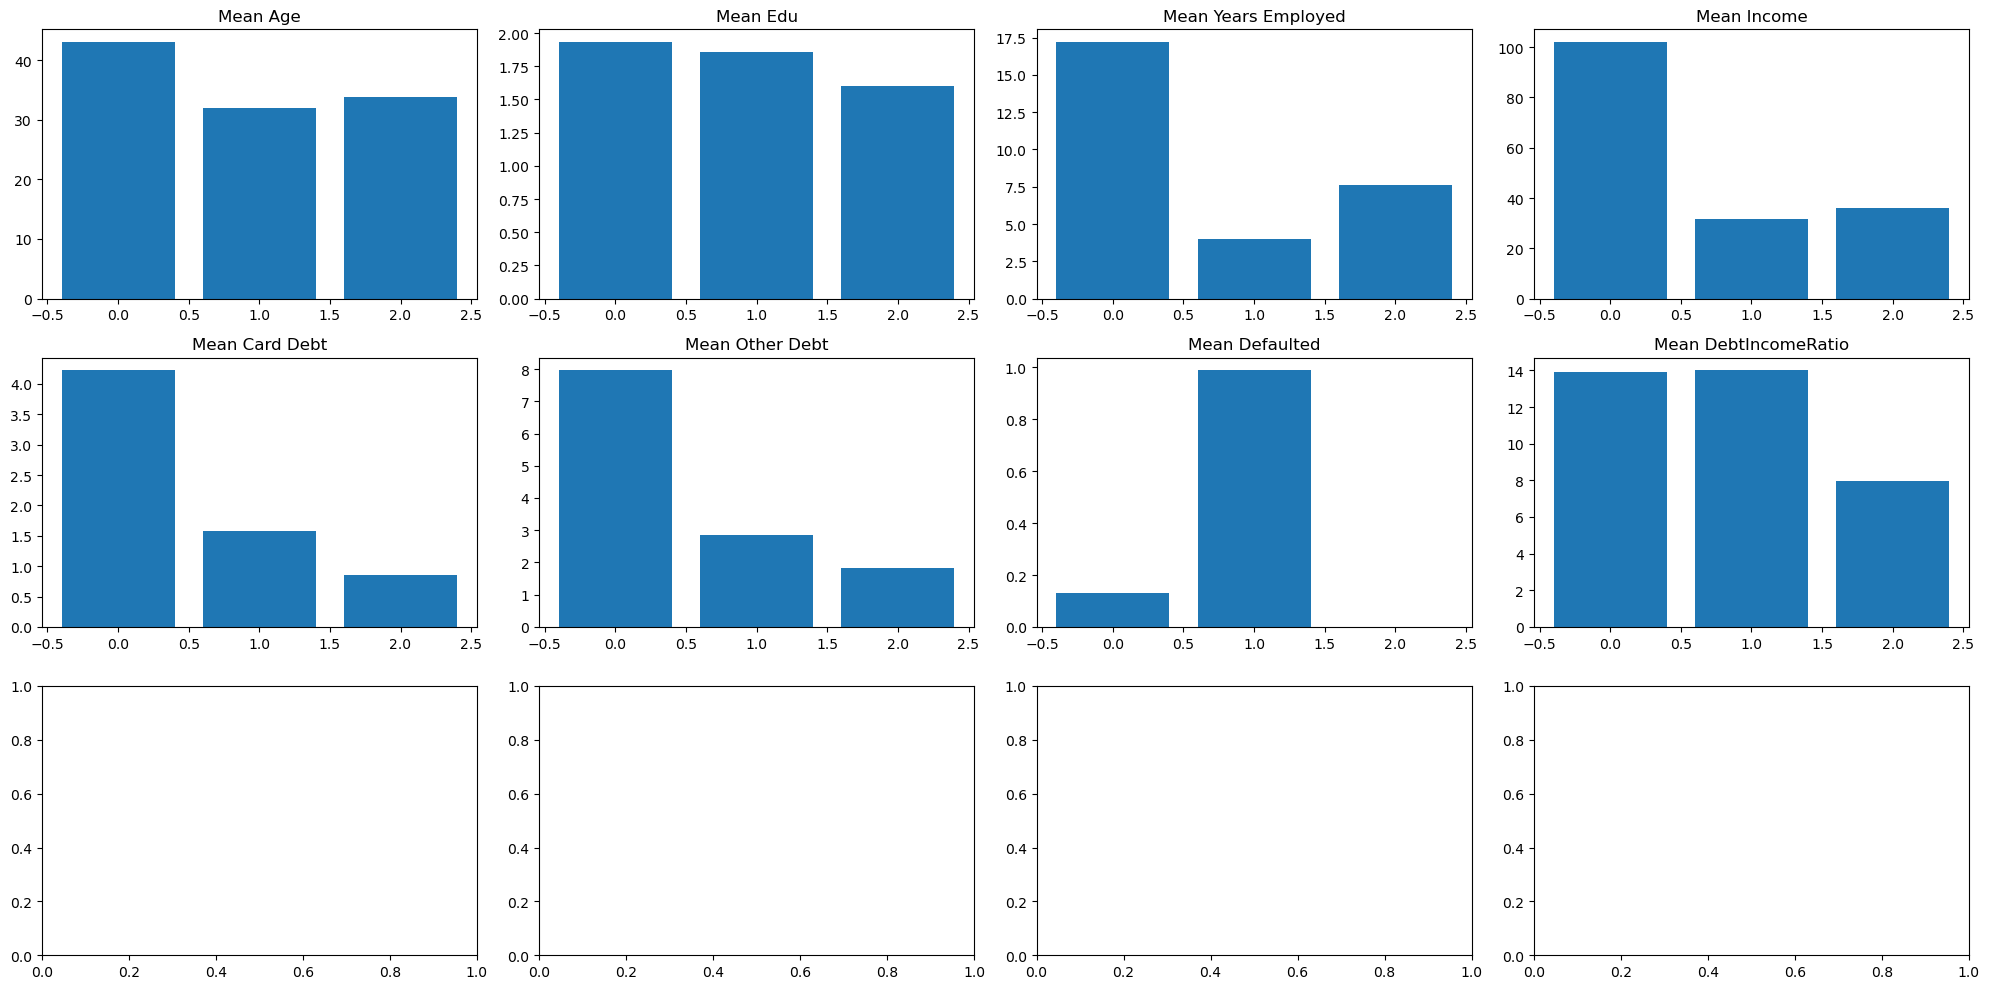

In [61]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for i, col in enumerate(cluster_groups.columns[1:]): 
    ax[i//4, i%4].bar(cluster_groups['cluster'], cluster_groups[col])  
    ax[i//4, i%4].set_title(f'Mean {col}')  
plt.tight_layout() 

    

# cluster 0 :

Income for individuals in the first group is higher than the average in the other groups.
The average debt of individuals in the first group is higher than the average in the other groups.
There is a slightly smaller percentage of people in the first group who defaulted compared to the second group.
The debt-to-income ratio for individuals in the first group is similar to that of the second group.

# cluster 1 :
The income of individuals in the second group is lower than the average in the first and third groups.
The debt-to-income ratio in the second group is greater than in the third group and less than in the first group.
There is a very high percentage of individuals in the second group who default.
The debt-to-income ratio is high in the second group.


# cluster 3 :

The third group has a similar average age than the second group, but it has more years of work than the second group, and its income is higher than the second group and lower than the first group. Also, the percentage of debts in the third group is less than the two approved and Turkish, and the fee does not include the repayment percentage, which indicates that it is not responsible for this group.